## Stroke Prediction (Logistic Regression and SVM)

In [35]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import joblib
import matplotlib.pyplot as pyplt

In [36]:
# import libraries for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# import libraries for svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [37]:
# Dataset

dataset = pd.read_csv("C:/Users/daxab/py projects/ml_projects/datasets/healthcare-dataset-stroke-data.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Dataset Exploration

In [38]:
# Checking for Missing Values

missValues = dataset.isnull().sum()
print("Missing Values:", missValues)

Missing Values: id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [39]:
# check if there are any null values
dataset.isnull().values.any()

True

In [40]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [41]:
cols_with_zero_invalid = ['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type' , 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

zero_rows = dataset[(dataset[cols_with_zero_invalid] == 0).any(axis=1)]
print(zero_rows)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [42]:
print((dataset[cols_with_zero_invalid] == 0).sum())

age                     0
hypertension         4612
heart_disease        4834
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status          0
dtype: int64


In [43]:
from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [44]:
# Handle numeric columns - replace 0 with NaN and impute with median
dataset[numeric_cols] = dataset[numeric_cols].replace(0, np.nan)
numeric_imputer = SimpleImputer(strategy="median")
dataset[numeric_cols] = numeric_imputer.fit_transform(dataset[numeric_cols])


In [45]:
# Handle categorical columns - impute missing values with mode (most frequent)
categorical_imputer = SimpleImputer(strategy="most_frequent")
dataset[categorical_cols] = categorical_imputer.fit_transform(dataset[categorical_cols])

Countplot

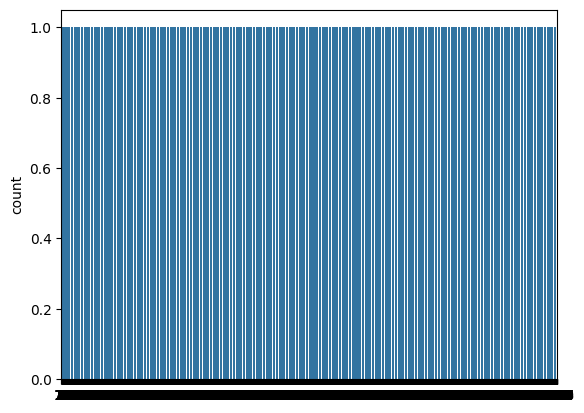

In [46]:
sns.countplot(dataset['stroke'], label='Count')
pyplt.show()

## Data Pre-Processing (checking data types and encoding categorical variables)

In [47]:
# Check data types and unique values before encoding
print("Data types:")
print(dataset.dtypes)
print("\nUnique values in each column:")
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")

# Encode ALL categorical variables
categorical_cols_all = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

label_encoders = {}
for col in categorical_cols_all:
    if col in dataset.columns and dataset[col].dtype == 'object':
        le = LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col])
        label_encoders[col] = le
        print(f"Encoded {col}: {le.classes_}")

Data types:
id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Unique values in each column:
id: [ 9046 51676 31112 ... 19723 37544 44679]
gender: ['Male' 'Female' 'Other']
age: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01

Correlation Matrix

In [48]:
dataset2 = dataset.drop(columns=['id','stroke'])

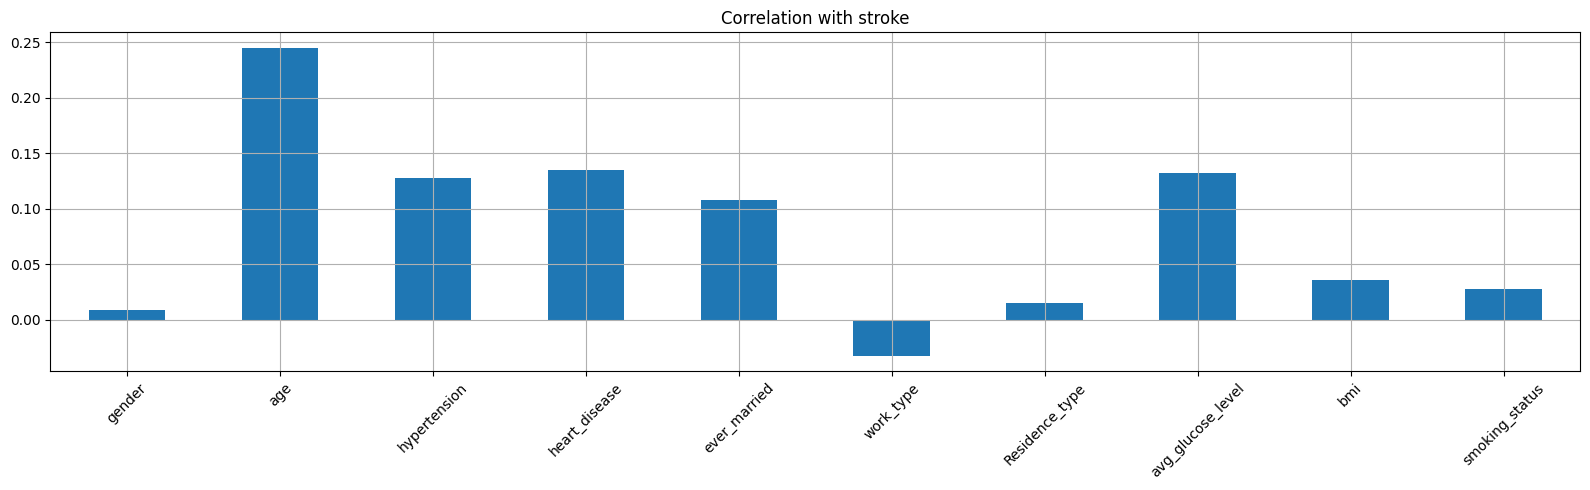

In [49]:
# Correlation with target variable
dataset2.corrwith(dataset['stroke']).plot.bar(
    figsize=(16,5), title='Correlation with stroke', 
    rot=45, grid=True
)
pyplt.tight_layout()
pyplt.show()

Heatmap

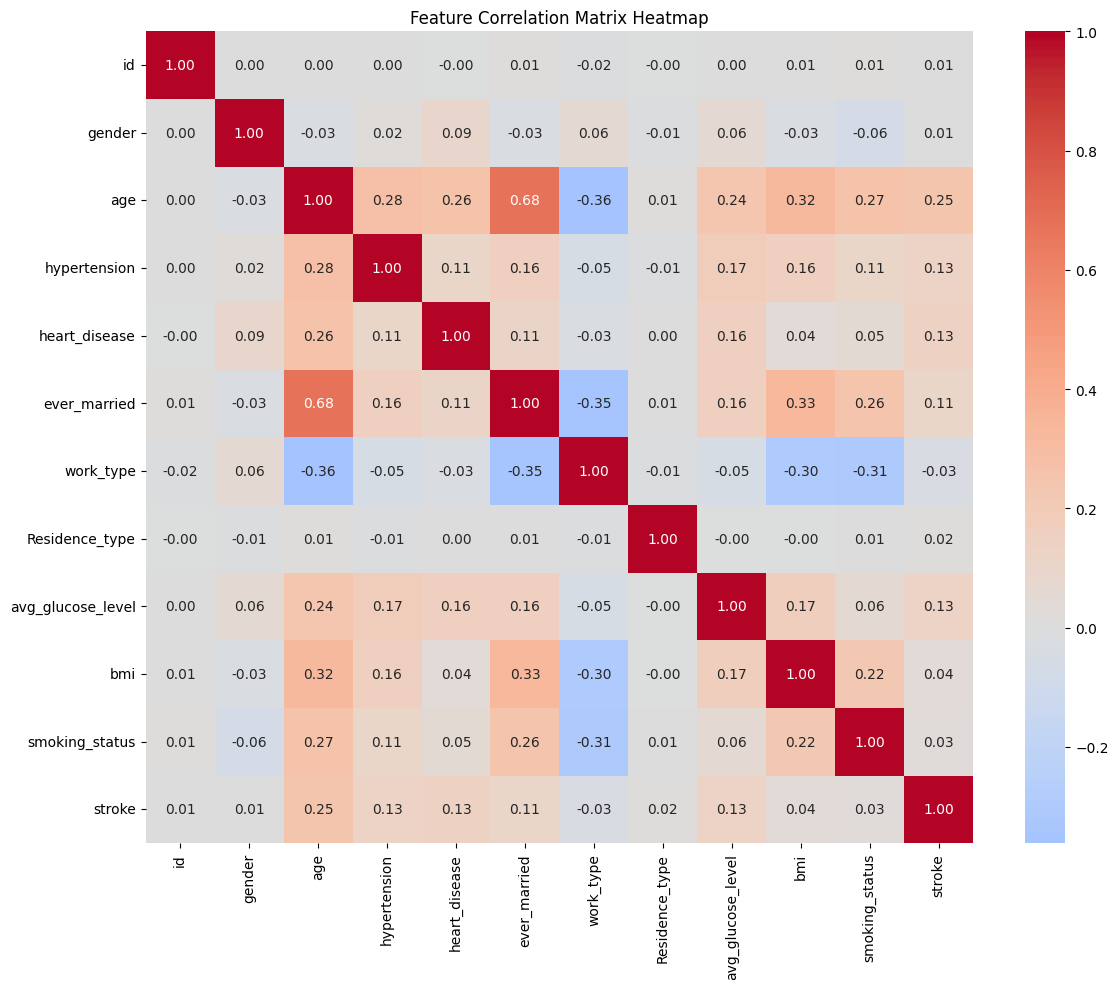

In [50]:
pyplt.figure(figsize=(12, 10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
pyplt.title('Feature Correlation Matrix Heatmap')
pyplt.tight_layout()
pyplt.show()

## First Model - Logistic Regression Model

Scaling Features and Splitting Dataset

In [51]:
# Prepare features and target
X = dataset.drop('stroke', axis=1)  # Features
y = dataset['stroke']  # Target variable

# Check if there are still any object columns
print("\nData types after encoding:")
print(X.dtypes)


Data types after encoding:
id                     int64
gender                 int32
age                  float64
hypertension           int32
heart_disease          int32
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
dtype: object


In [52]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training

In [53]:
# Create and train the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [54]:
# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

Evaluation

In [55]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9501

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



In [56]:
# Feature importance heatmap
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(log_reg.coef_[0])
}).sort_values('importance', ascending=False)

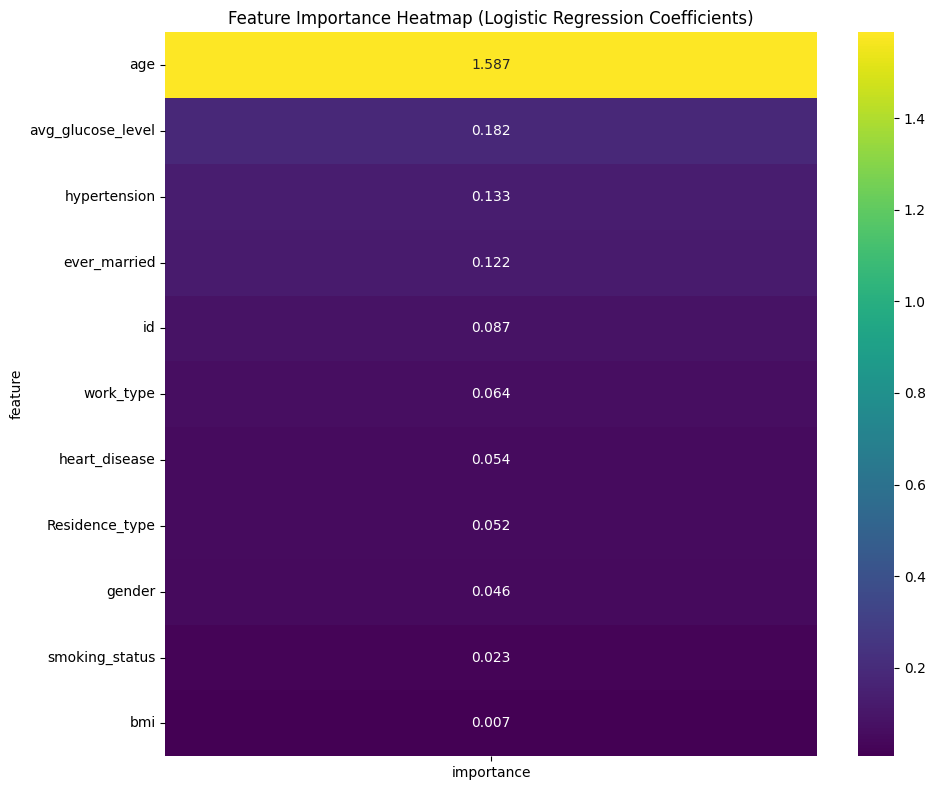

In [57]:
pyplt.figure(figsize=(10, 8))
sns.heatmap(feature_importance.set_index('feature')[['importance']], 
            annot=True, cmap='viridis', fmt='.3f')
pyplt.title('Feature Importance Heatmap (Logistic Regression Coefficients)')
pyplt.tight_layout()
pyplt.show()

## Second Model - Support Vector Machine

In [58]:
# Use the same preprocessed data from logistic regression
# X_train_scaled, X_test_scaled, y_train, y_test are already available

# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())

Class distribution in training set:
stroke
0    3889
1     199
Name: count, dtype: int64

Class distribution in test set:
stroke
0    972
1     50
Name: count, dtype: int64


Building the Model

In [59]:
# Create SVM model with class balancing
svm_model = SVC(kernel='rbf', random_state=42, probability=True, class_weight='balanced')

Training the Model

In [60]:
# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [61]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

Evaluation

In [62]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0))

SVM Accuracy: 0.7613

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       972
           1       0.12      0.64      0.21        50

    accuracy                           0.76      1022
   macro avg       0.55      0.70      0.53      1022
weighted avg       0.93      0.76      0.83      1022



In [63]:
# Hyperparameter tuning with GridSearchCV - reduced grid for faster execution
print("\nPerforming hyperparameter tuning...")
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(SVC(random_state=42, probability=True), 
                          param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


Performing hyperparameter tuning...


,estimator,SVC(probabili...ndom_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'class_weight': ['balanced', None], 'gamma': ['scale', 'auto', ...], 'kernel': ['rbf', 'linear']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [64]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.9513


In [65]:
# Train best model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

## Comparison of Results

In [66]:
# Evaluate best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nBest SVM Accuracy: {accuracy_best:.4f}")
print("\nBest SVM Classification Report:")
print(classification_report(y_test, y_pred_best, zero_division=0))

# Compare models
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM (default)', 'SVM (tuned)'],
    'Accuracy': [accuracy, accuracy_svm, accuracy_best]
})


Best SVM Accuracy: 0.9511

Best SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



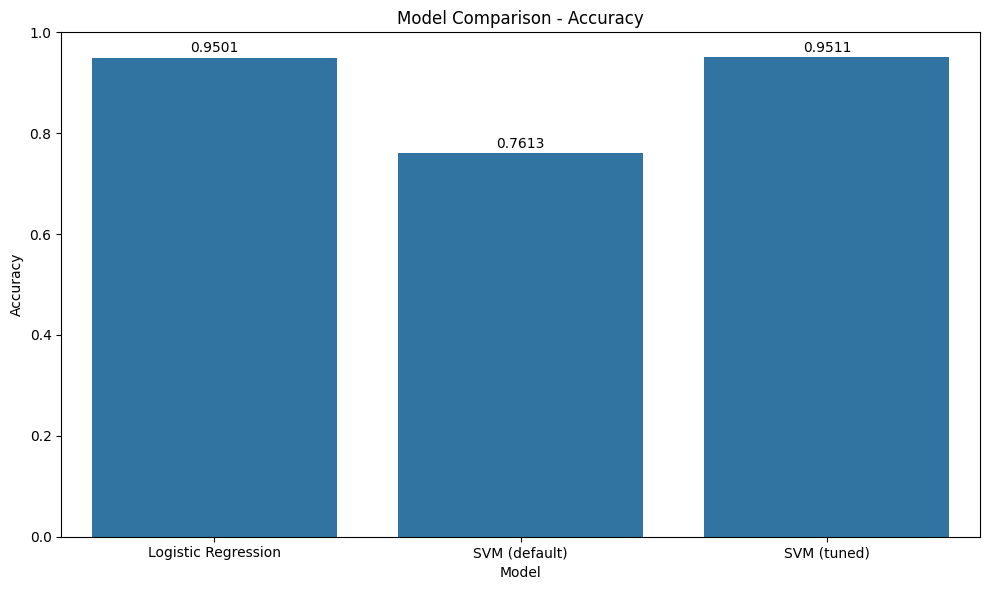

In [69]:
pyplt.figure(figsize=(10, 6))
sns.barplot(data=comparison, x='Model', y='Accuracy')
pyplt.title('Model Comparison - Accuracy')
pyplt.ylim(0, 1)
for i, v in enumerate(comparison['Accuracy']):
    pyplt.text(i, v + 0.01, f'{v:.4f}', ha='center')
pyplt.tight_layout()
pyplt.show()


In [ ]:
print("\nModel Comparison:")
print(comparison)


Model Comparison:
                 Model  Accuracy
0  Logistic Regression  0.950098
1        SVM (default)  0.761252
2          SVM (tuned)  0.951076


PKL Saving

In [68]:
# Save trained models
#joblib.dump(log_reg, "logistic_regression_model.pkl")
#joblib.dump(best_svm, "best_svm_model.pkl")

#print("Models saved successfully as .pkl files.")
